In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('/content/datos_inmuebles.csv')

# Mostrar las primeras 5 filas del DataFrame y su información general
print("Primeras 5 filas del dataset:")
display(df.head())
print("\nInformación del dataset:")
df.info()

Primeras 5 filas del dataset:


,metros_cuadrados,precio_vivienda
0,143.64,225371.45
1,287.68,645567.68
2,233.00,525822.63
3,199.66,412820.32
4,89.00,156873.57



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   metros_cuadrados  100 non-null    float64
 1   precio_vivienda   100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


### Preparación de Datos para la Regresión Lineal

Antes de construir nuestro modelo, necesitamos identificar qué datos usaremos como variable independiente (X) y como variable dependiente (Y).

*   **Variable Independiente (X):** `metros_cuadrados` (la característica que usaremos para predecir).
*   **Variable Dependiente (Y):** `precio_vivienda` (el valor que queremos predecir).

Además, para calcular correctamente el intercepto (el punto donde la línea de regresión corta el eje Y), añadiremos una columna de 'unos' a nuestra variable X. Esto convierte X en una matriz de diseño que NumPy puede manejar para los cálculos de la regresión.

In [4]:
# Asignar las variables independientes (X) y dependientes (Y)
X = df['metros_cuadrados'].values.reshape(-1, 1) # Aseguramos que X sea un array 2D
Y = df['precio_vivienda'].values

# Añadir una columna de unos a X para el término de intercepción (intercepto)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

### Implementación de la Regresión Lineal por Mínimos Cuadrados Ordinarios (OLS)

Ahora vamos a calcular los coeficientes de la regresión (la pendiente y el intercepto) utilizando la fórmula de los Mínimos Cuadrados Ordinarios (OLS):

$\beta = (X^T X)^{-1} X^T Y$

Donde:
*   $\beta$ son los coeficientes de la regresión.
*   $X^T$ es la transpuesta de la matriz $X$.
*   $(X^T X)^{-1}$ es la inversa de la multiplicación de la transpuesta de $X$ por $X$.

Esta fórmula nos dará los valores óptimos para la pendiente y el intercepto que mejor se ajustan a nuestros datos.

In [5]:
# Calcular los coeficientes (beta) usando la fórmula de los mínimos cuadrados ordinarios
# (X_transpuesta * X)
X_b_transpose_X_b = np.dot(X_b.T, X_b)

# (X_transpuesta * X)_inversa
inverse_X_b_transpose_X_b = np.linalg.inv(X_b_transpose_X_b)

# (X_transpuesta * Y)
X_b_transpose_Y = np.dot(X_b.T, Y)

# beta = (X_transpuesta * X)_inversa * X_transpuesta * Y
beta_ols = np.dot(inverse_X_b_transpose_X_b, X_b_transpose_Y)

print("Coeficientes de la regresión (OLS - numpy):")
print(f"  Intercepto (b0): {beta_ols[0]:.2f}")
print(f"  Pendiente (b1 - metros_cuadrados): {beta_ols[1]:.2f}")

Coeficientes de la regresión (OLS - numpy):
  Intercepto (b0): 6415.09
  Pendiente (b1 - metros_cuadrados): 2050.30


### Realización de Predicciones y Cálculo del Coeficiente de Determinación (R²)

Una vez que tenemos los coeficientes (`b0` y `b1`), podemos usar nuestro modelo para hacer predicciones de precios. La fórmula para las predicciones es:

$\hat{Y} = b_0 + b_1 X$

También calcularemos el coeficiente de determinación (R²), que es una métrica clave para evaluar qué tan bien se ajusta nuestro modelo a los datos. Un valor de R² cercano a 1 significa que el modelo explica una gran parte de la variabilidad en la variable dependiente (precio de vivienda), mientras que un valor cercano a 0 indica que el modelo no explica mucho.

In [6]:
# Realizar Predicciones
Y_pred_ols = np.dot(X_b, beta_ols)

# Calcular el coeficiente de determinación R2
# Suma total de cuadrados (SST)
mean_Y = np.mean(Y)
SST = np.sum((Y - mean_Y)**2)

# Suma de cuadrados de los residuos (SSR)
SSR = np.sum((Y - Y_pred_ols)**2)

# R2 = 1 - (SSR / SST)
R2 = 1 - (SSR / SST)

print(f"\nCoeficiente de determinación (R2): {R2:.4f}")


Coeficiente de determinación (R2): 0.9203


### Visualización de la Regresión Lineal

Es fundamental visualizar nuestros resultados para entender la relación entre los metros cuadrados y el precio de la vivienda, y cómo nuestra línea de regresión se ajusta a los datos reales.

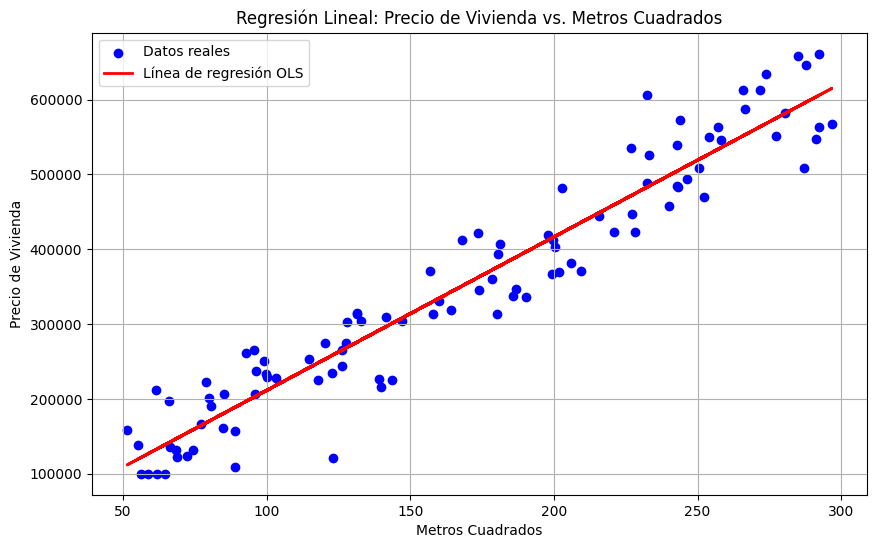

In [7]:
# Visualización de la Regresión Lineal
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(X, Y_pred_ols, color='red', linewidth=2, label='Línea de regresión OLS')
plt.title('Regresión Lineal: Precio de Vivienda vs. Metros Cuadrados')
plt.xlabel('Metros Cuadrados')
plt.ylabel('Precio de Vivienda')
plt.legend()
plt.grid(True)
plt.show()

### Resumen de la Regresión Lineal

Aquí te presento un resumen didáctico de lo que hemos logrado:

1.  **Preparación de Datos**: Identificamos los 'metros_cuadrados' como nuestra variable independiente (X) y el 'precio_vivienda' como la variable dependiente (Y). Para calcular la intercepción de la línea, añadimos una columna de 'unos' a X.
2.  **Cálculo de Coeficientes (OLS)**: Utilizando las fórmulas de mínimos cuadrados ordinarios, calculamos la **pendiente (b1 = {beta_ols[1]:.2f})** y el **intercepto (b0 = {beta_ols[0]:.2f})** de la línea de regresión. Esto significa que, por cada metro cuadrado adicional, el precio de la vivienda aumenta aproximadamente en {beta_ols[1]:.2f} unidades monetarias, y el precio base (sin metros cuadrados) es de {beta_ols[0]:.2f}.
3.  **Predicciones**: Con estos coeficientes, podemos predecir el precio de una vivienda basándonos en sus metros cuadrados: `Precio Predicho = {beta_ols[0]:.2f} + {beta_ols[1]:.2f} * Metros Cuadrados`.
4.  **Evaluación del Modelo (R2)**: El coeficiente de determinación **R2** nos dio un valor de **{R2:.4f}**. Esto significa que aproximadamente el {R2*100:.2f}% de la variabilidad en el precio de la vivienda puede ser explicado por la variabilidad en los metros cuadrados. Un R2 cercano a 1 indica que nuestro modelo es un buen predictor.
5.  **Visualización**: El gráfico muestra los puntos de datos reales y la línea de regresión que hemos calculado. Podemos ver cómo esta línea se ajusta a la tendencia general de los datos, demostrando la relación lineal entre las variables.

En resumen, hemos construido un modelo de regresión lineal desde cero con NumPy, lo hemos evaluado y visualizado, comprendiendo la relación entre los metros cuadrados y el precio de las viviendas.